# Primera versión del EDA

In [1]:
import pandas as pd
import seaborn as sns
from src.utils.utils import get_base_dir
from matplotlib import pyplot as plt

## Importar conjuntos de datos

### Definir archivos a leer

In [2]:
# rutas
base_dir = get_base_dir()
data_path_sell_in = base_dir / "data" / "raw" / "sell-in.txt"
data_path_tb_productos = base_dir / "data" / "raw" / "tb_productos.txt"
data_path_tb_stocks = base_dir / "data" / "raw" / "tb_stocks.txt"

# importar datos
sell_in = pd.read_csv(data_path_sell_in, sep="\t", encoding="utf-8")
tb_productos = pd.read_csv(data_path_tb_productos, sep="\t", encoding="utf-8")
tb_stocks = pd.read_csv(data_path_tb_stocks, sep="\t", encoding="utf-8")

print(f"Datos sell_in: {sell_in.shape}")
print(f"Datos tb_productos: {tb_productos.shape}")
print(f"Datos tb_stocks: {tb_stocks.shape}")

# limpio duplicados
sell_in = sell_in.drop_duplicates()
tb_productos = tb_productos.drop_duplicates()
tb_stocks = tb_stocks.drop_duplicates()

print(f"Datos sell_in sin duplicados: {sell_in.shape}")
print(f"Datos tb_productos sin duplicados: {tb_productos.shape}")   
print(f"Datos tb_stocks sin duplicados: {tb_stocks.shape}")

Datos sell_in: (2945818, 7)
Datos tb_productos: (1251, 7)
Datos tb_stocks: (13691, 3)
Datos sell_in sin duplicados: (2945818, 7)
Datos tb_productos sin duplicados: (1251, 7)
Datos tb_stocks sin duplicados: (13691, 3)


## Primeros registros

In [3]:
display("SELL-IN")
display(sell_in.head(5))
display("TB_PRODUCTOS")
display(tb_productos.head(5))
display("TB_STOCKS")
display(tb_stocks.head(5))

'SELL-IN'

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn
0,201701,10234,20524,0,2,0.05300,0.05300
1,201701,10032,20524,0,1,0.13628,0.13628
2,201701,10217,20524,0,1,0.03028,0.03028
3,201701,10125,20524,0,1,0.02271,0.02271
4,201701,10012,20524,0,11,1.54452,1.54452


'TB_PRODUCTOS'

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion
0,FOODS,ADEREZOS,Aji Picante,NATURA,240,20609,Salsa Aji Picante
1,FOODS,ADEREZOS,Barbacoa,NATURA,250,20266,Salsa Barbacoa
2,FOODS,ADEREZOS,Barbacoa,NATURA,400,20325,Salsa Barbacoa
3,FOODS,ADEREZOS,Barbacoa,NATURA,500,20503,Salsa Barbacoa
4,FOODS,ADEREZOS,Chimichurri,NATURA,350,20797,Chimichurri


'TB_STOCKS'

,periodo,product_id,stock_final
0,201810,20524,1.61267
1,201810,20311,2.93657
2,201810,20654,6.83269
3,201810,21005,1.01338
4,201810,20974,0.34595


## TB_STOCKS

In [4]:
tb_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13691 entries, 0 to 13690
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   periodo      13691 non-null  int64  
 1   product_id   13691 non-null  int64  
 2   stock_final  13691 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 321.0 KB


In [5]:
data = tb_stocks.groupby("periodo").agg({'product_id': 'nunique', 'stock_final': ['sum', 'mean', 'min', 'max']}).reset_index(drop=False).sort_values(by="periodo", ascending=True)
data.columns = ["periodo", "num_productos", "stock_final_sum", "stock_final_mean", "stock_final_min", "stock_final_max"]
data

,periodo,num_productos,stock_final_sum,stock_final_mean,stock_final_min,stock_final_max
0,201810,896,21582.70292,24.087838,-0.53452,978.16446
1,201811,897,19480.40196,21.717282,-1.81916,746.38746
2,201812,891,18413.10512,20.665662,-4.00864,680.20271
3,201901,885,15956.45471,18.029892,-7.72120,544.71331
4,201902,892,16662.34799,18.679762,-5.18307,592.10902
5,201903,893,12140.71982,13.595431,-13.66656,752.63453
6,201904,915,14378.38876,15.714086,-27.31136,711.09039
7,201905,909,18507.70184,20.360508,-2.14644,535.77171
8,201906,914,18092.56616,19.794930,-4.87775,519.38537
9,201907,931,24121.33828,25.909064,-8.19961,1037.85386


<Axes: title={'center': 'Número de productos por periodo'}>

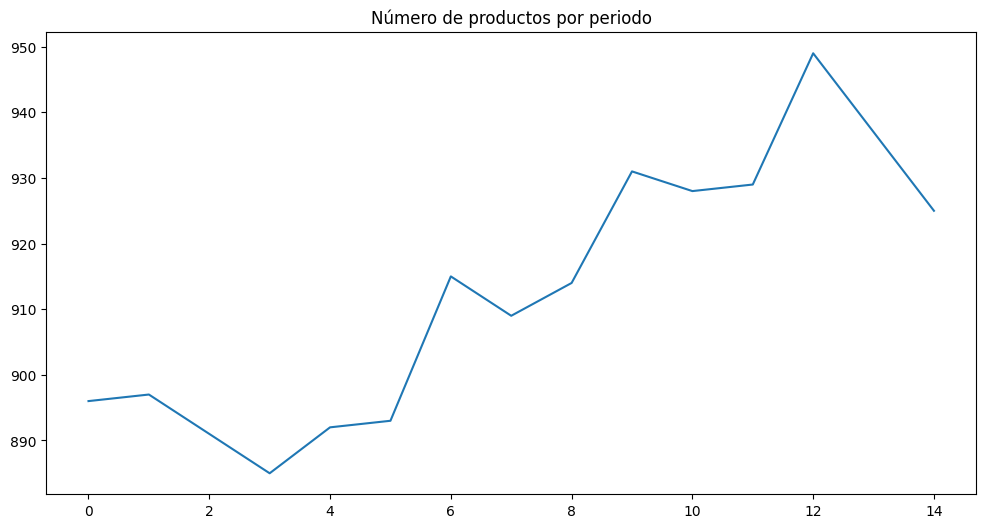

In [6]:
data.num_productos.plot(kind="line", figsize=(12, 6), title="Número de productos por periodo")

<Axes: title={'center': 'Stock final total por periodo'}>

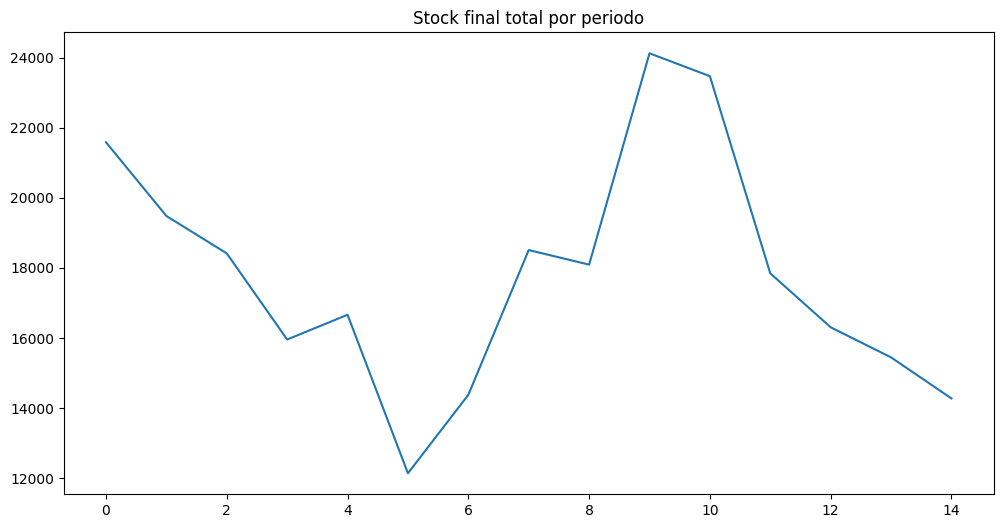

In [7]:
data.stock_final_sum.plot(kind="line", figsize=(12, 6), title="Stock final total por periodo")

## TB_PRODUCTOS

In [8]:
tb_productos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cat1         1251 non-null   object
 1   cat2         1251 non-null   object
 2   cat3         1251 non-null   object
 3   brand        1251 non-null   object
 4   sku_size     1251 non-null   int64 
 5   product_id   1251 non-null   int64 
 6   descripcion  1251 non-null   object
dtypes: int64(2), object(5)
memory usage: 68.5+ KB


In [9]:
for col in tb_productos.columns:
    if tb_productos[col].dtype == "object":
        print(f"Columna '{col}' tiene {tb_productos[col].nunique()} valores únicos.")
        print(tb_productos[col].value_counts(dropna=False, normalize=True))
        print("\n")
        
print(f"Columna 'sku_size' tiene {tb_productos['sku_size'].nunique()} valores únicos.")
print("\n")
print(f"Columna 'product_id' tiene {tb_productos['product_id'].nunique()} valores únicos.")
print("\n")

Columna 'cat1' tiene 4 valores únicos.
cat1
PC       0.576339
HC       0.233413
FOODS    0.179856
REF      0.010392
Name: proportion, dtype: float64


Columna 'cat2' tiene 15 valores únicos.
cat2
CABELLO                0.281375
DEOS                   0.134293
SOPAS Y CALDOS         0.106315
PIEL2                  0.091127
ROPA LAVADO            0.079137
HOGAR                  0.061551
PIEL1                  0.058353
ADEREZOS               0.055156
VAJILLA                0.037570
PROFESIONAL            0.027178
ROPA ACONDICIONADOR    0.026379
OTROS                  0.018385
DENTAL                 0.011191
TE                     0.010392
ROPA MANCHAS           0.001599
Name: proportion, dtype: float64


Columna 'cat3' tiene 99 valores únicos.
cat3
SHAMPOO           0.115108
ACONDICIONADOR    0.094325
Aero              0.091127
Liquido           0.050360
Polvo             0.038369
                    ...   
Pies Aero         0.000799
Pies NoAero       0.000799
Alcohol           0.000799
D

In [10]:
# hay 1251 valores de product_id únicos pero el catalogo tiene 1262 filas... hay repetidos?
# en el archivo original habia filas repetidas....
# luego de limpiar los duplicados, vemos que siguen apareciendo repetidos... SON 2 PRODUCTOS con mismo ID pero diferente cat3
tb_productos[tb_productos['product_id'].duplicated()]

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion


In [11]:
tb_productos[tb_productos["product_id"]==20623]

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion
581,PC,CABELLO,ACONDICIONADOR,SHAMPOO3,350,20623,Sabor 8


In [12]:
tb_productos[tb_productos["product_id"]==20230]

,cat1,cat2,cat3,brand,sku_size,product_id,descripcion
582,PC,CABELLO,ACONDICIONADOR,SHAMPOO3,350,20230,Sabor 9


In [13]:
# fix cat como shapoo
tb_productos.loc[tb_productos["product_id"]==20230, "cat3"] = "Shampoo y Acondicionador"
tb_productos.loc[tb_productos["product_id"]==20623, "cat3"] = "Shampoo y Acondicionador"

In [14]:
print(tb_productos.shape)
tb_productos = tb_productos.drop_duplicates()
print(tb_productos.shape)

(1251, 7)
(1251, 7)


## SELL-IN

Campos:

* **periodo**

Es el mes al que corresponde la foto
periodo  202504   son todas las ventas realizadas entre '20250401  00:00:00' y '20250430  23:59:59'

* **customer_id**

Es el numero unico que identica a un cliente,  a uno de los ~550 clientes que posee la empresa,  Cadenas de supermercados,  Mayoristas y Distribuidores
Por supuesto hay clientes pequenos que en un mes dado no compran absolutamente nada

* **product_id**

identifica  al producto

* **plan_precios_cuidados**

Es una marca  {0, 1}  de si ese producto participa del Plan Precios  Cuidados impulsado por el gobierno  https://es.wikipedia.org/wiki/Precios_Cuidados

* **cust_request_qty**

Es la cantidad de cajas que el cliente quizo comprar durante ese mes a La Multinacional,  esto esta ya netado de ordenes caidas
La unidad minima de un pedido es 1 caja,  la que por supuesto dependiendo del tamano del producto posee distinta cantidad de envases
Un cliente pone una orden y La Multinacional tiene aproximadamente tres dias para cumplirla (depende de que tan grande es el cliente,  hay un  Service Level Agreement distinto con cada cliente)
generalmente esa cantidad SI es honrada por La  Multinacional

* **cust_request_tn**

Es simplemente    cust_request_qty   por el peso en toneladas de una caja de ese producto

* **tn**

Este es el principal campo del dataset
Es la cantidad REAL de toneladas vendidas  de ese producto, a ese cliente, en ese periodo

In [15]:
sell_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2945818 entries, 0 to 2945817
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   periodo                int64  
 1   customer_id            int64  
 2   product_id             int64  
 3   plan_precios_cuidados  int64  
 4   cust_request_qty       int64  
 5   cust_request_tn        float64
 6   tn                     float64
dtypes: float64(2), int64(5)
memory usage: 157.3 MB


### Validaciones

In [16]:
print(sell_in.shape)
print(sell_in[["periodo","customer_id","product_id","tn"]].drop_duplicates().shape)

(2945818, 7)
(2945818, 4)


ok.. no hay registros duplicados

In [17]:
data = sell_in.groupby("periodo").agg(
    {
        'customer_id': 'nunique', 
        'product_id': 'nunique', 
        'plan_precios_cuidados': ['sum', 'mean'], 
        'cust_request_qty': ['sum', 'mean', 'min', 'max'],
        'cust_request_tn': ['sum', 'mean', 'min', 'max'],
        'tn': ['sum', 'mean', 'min', 'max']
    }).reset_index(drop=False).sort_values(by="periodo", ascending=True)
data.columns = [
    "periodo", 
    "num_customers", 
    "num_products", 
    "plan_precios_cuidados_sum", 
    "plan_precios_cuidados_mean", 
    "cust_request_qty_sum", 
    "cust_request_qty_mean", 
    "cust_request_qty_min", 
    "cust_request_qty_max",
    "cust_request_tn_sum", 
    "cust_request_tn_mean", 
    "cust_request_tn_min", 
    "cust_request_tn_max",
    "tn_sum", 
    "tn_mean", 
    "tn_min", 
    "tn_max"
]

# Convertir 'periodo' a datetime (primero de cada mes)
data["fecha"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")

# Establecer 'fecha' como índice
data.set_index("fecha", inplace=True)

data

,periodo,num_customers,num_products,plan_precios_cuidados_sum,plan_precios_cuidados_mean,cust_request_qty_sum,cust_request_qty_mean,cust_request_qty_min,cust_request_qty_max,cust_request_tn_sum,cust_request_tn_mean,cust_request_tn_min,cust_request_tn_max,tn_sum,tn_mean,tn_min,tn_max
fecha,,,,,,,,,,,,,,,,,
2017-01-01,201701,433,785,1210,0.015349,187176,2.374426,1,68,34408.28784,0.436487,0.0001,184.72927,34057.31784,0.432035,0.0001,184.72927
2017-02-01,201702,449,781,1181,0.014355,166579,2.024784,1,59,35375.02661,0.429987,0.0001,198.84365,34568.65311,0.420185,0.0001,198.84365
2017-03-01,201703,474,786,1400,0.015452,205059,2.263269,1,71,46498.06920,0.513207,0.0001,313.90769,46040.59636,0.508158,0.0001,295.43924
2017-04-01,201704,471,784,1283,0.015488,181191,2.187320,1,74,40103.21866,0.484122,0.0001,267.35600,39625.52445,0.478355,0.0001,264.71445
2017-05-01,201705,486,806,661,0.006882,216183,2.250921,1,70,46225.46865,0.481305,0.0001,216.36069,45579.63296,0.474580,0.0001,216.36069
2017-06-01,201706,479,823,755,0.007851,215641,2.242313,1,85,45443.42636,0.472537,0.0001,246.24600,44853.30050,0.466401,0.0001,246.24600
2017-07-01,201707,471,826,499,0.006697,176380,2.367072,1,73,37727.18595,0.506310,0.0001,407.02225,36925.20583,0.495547,0.0001,379.44270
2017-08-01,201708,458,847,665,0.007186,195321,2.110780,1,72,40920.88120,0.442221,0.0001,247.01832,40206.38305,0.434499,0.0001,237.16848
2017-09-01,201709,492,829,645,0.007066,204462,2.239771,1,60,48723.36941,0.533738,0.0001,289.35024,47934.65801,0.525098,0.0001,289.35024


### Clientes

<Axes: title={'center': 'Número de clientes por periodo'}, xlabel='fecha'>

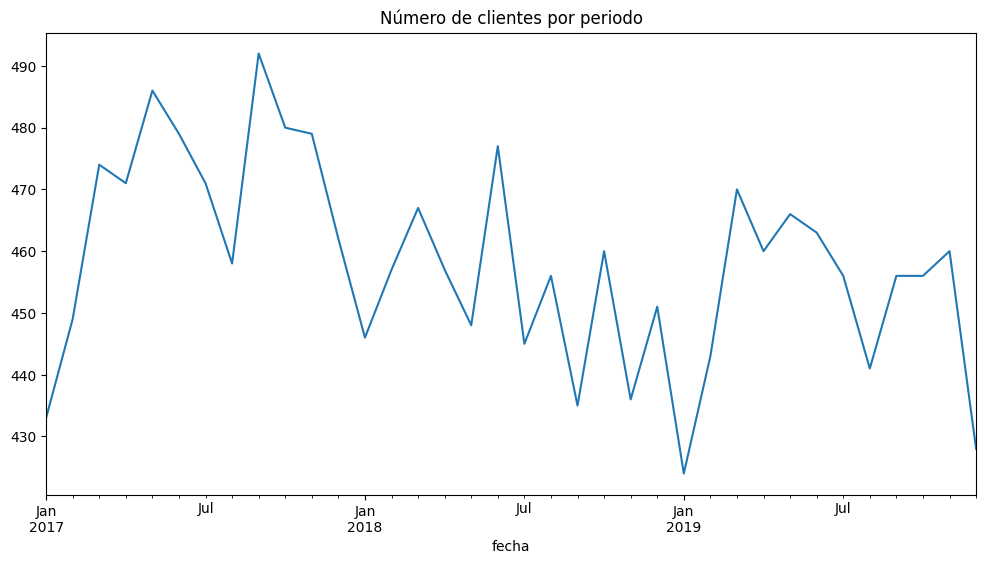

In [18]:
data["num_customers"].plot(kind="line", figsize=(12, 6), title="Número de clientes por periodo")

### Productos

<Axes: title={'center': 'Número de productos por periodo'}, xlabel='fecha'>

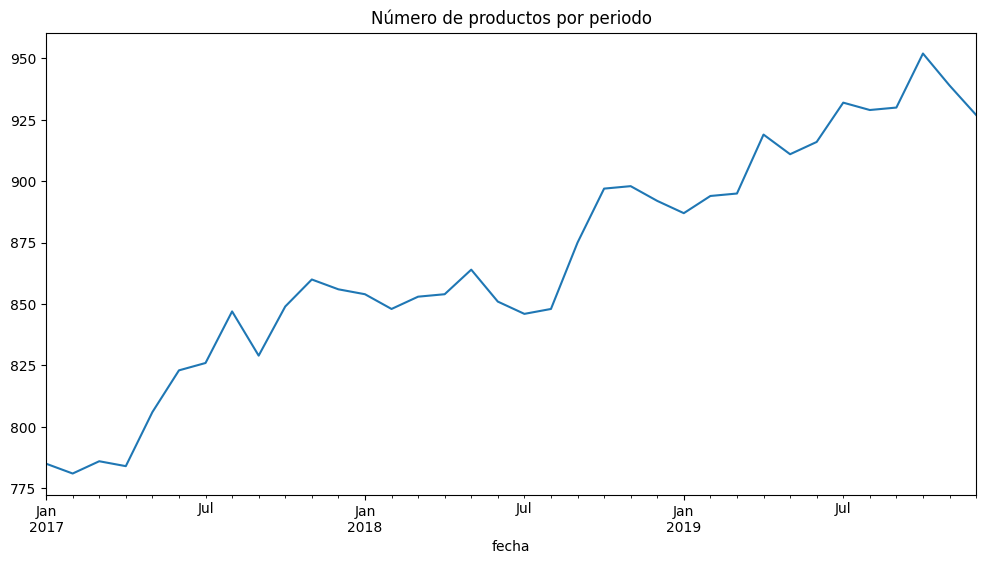

In [19]:
data["num_products"].plot(kind="line", figsize=(12, 6), title="Número de productos por periodo")

### Precios Cuidados

<Axes: title={'center': 'Plan precios cuidados medio por periodo'}, xlabel='fecha'>

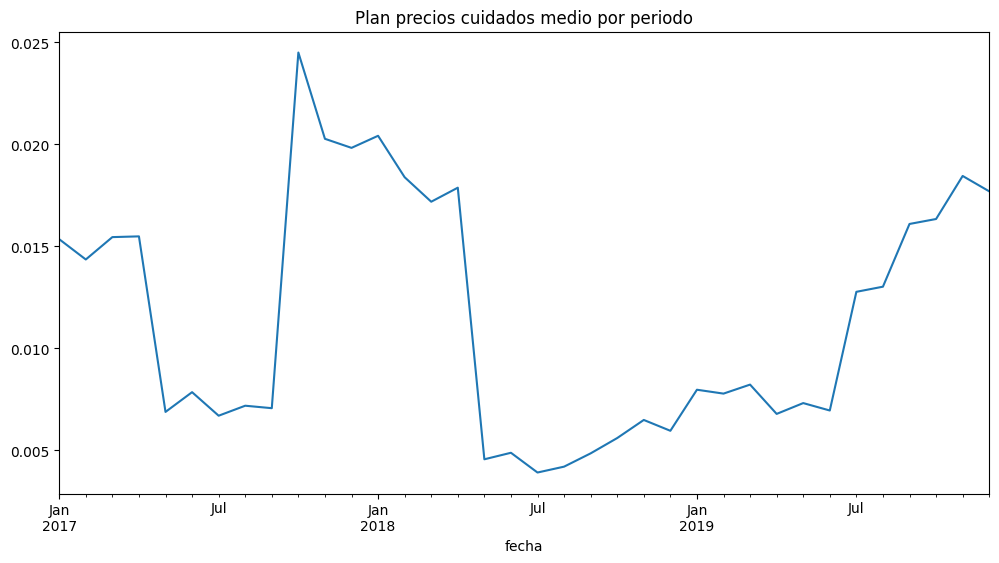

In [20]:
data["plan_precios_cuidados_mean"].plot(kind="line", figsize=(12, 6), title="Plan precios cuidados medio por periodo")

### Cantidad solicitada

<Axes: title={'center': 'Cantidad solicitada total por periodo'}, xlabel='fecha'>

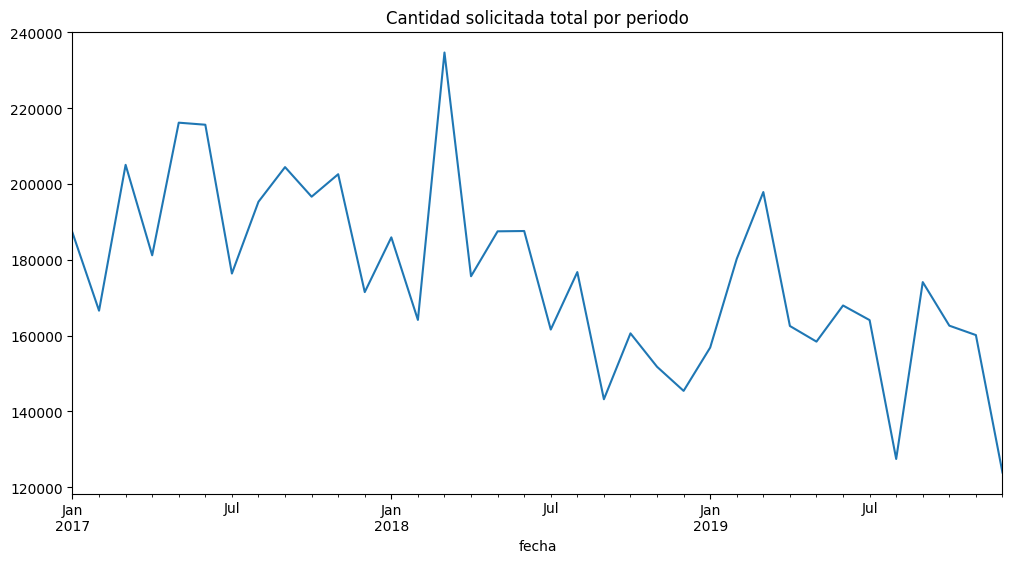

In [21]:
data["cust_request_qty_sum"].plot(kind="line", figsize=(12, 6), title="Cantidad solicitada total por periodo")

### Toneladas solicitadas

<Axes: title={'center': 'TN solicitados total por periodo'}, xlabel='fecha'>

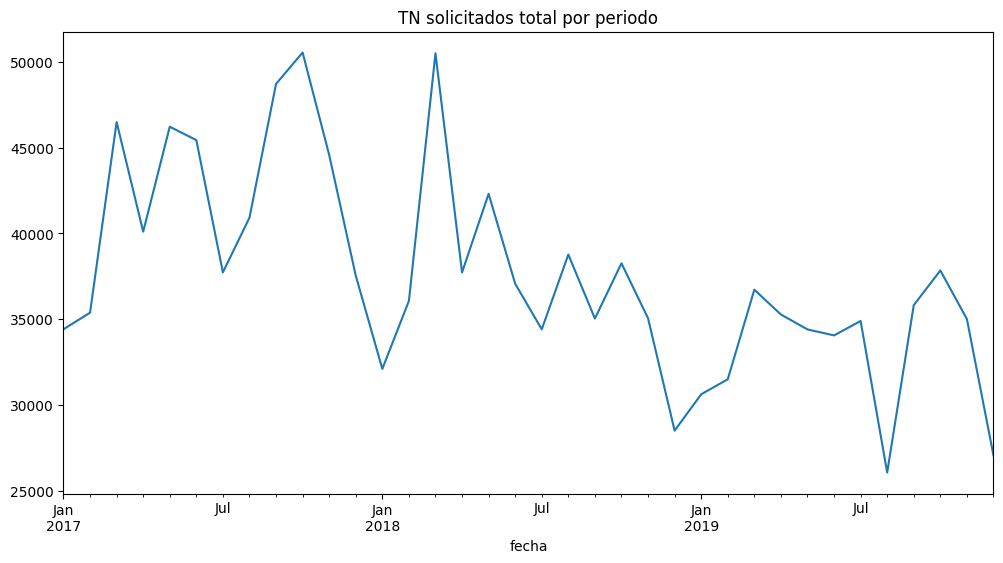

In [22]:
data["cust_request_tn_sum"].plot(kind="line", figsize=(12, 6), title="TN solicitados total por periodo")

### Toneladas demandadas

<Axes: title={'center': 'TN entregados total por periodo'}, xlabel='fecha'>

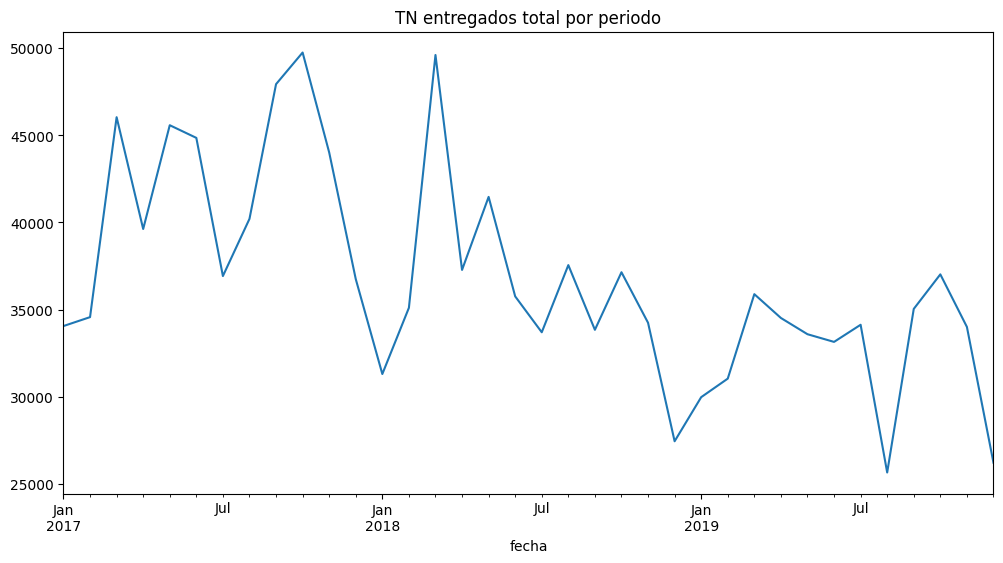

In [23]:
data["tn_sum"].plot(kind="line", figsize=(12, 6), title="TN entregados total por periodo")

### Check Toneladas demandadas

In [24]:
sell_in['tn'].describe([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.999,0.9999,0.99999]).round(3)

count      2945818.000
mean             0.450
std              3.108
min              0.000
10%              0.004
20%              0.008
30%              0.014
40%              0.022
50%              0.039
60%              0.066
70%              0.115
80%              0.231
90%              0.699
95%              1.568
99%              7.435
99.9%           36.600
99.99%         117.411
99.999%        266.537
max            547.878
Name: tn, dtype: float64

<Axes: >

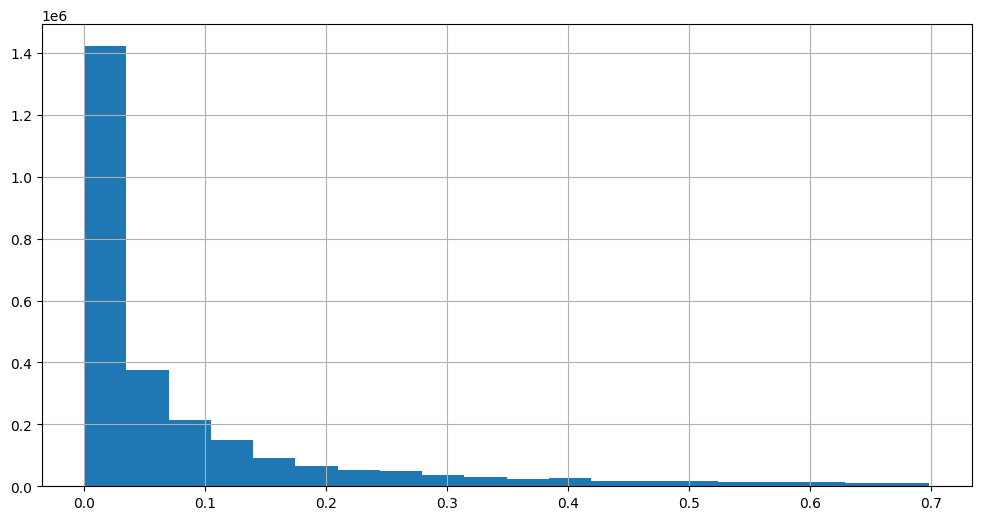

In [25]:
limite_tn = sell_in['tn'] < sell_in['tn'].quantile(0.9)
sell_in[limite_tn]['tn'].hist(bins=20, figsize=(12, 6), grid=True)

In [26]:
condicion = (sell_in["periodo"] == 201912) & (sell_in["cust_request_qty"] > 0)
sell_in[condicion][['customer_id','product_id','tn']].sort_values(by="tn", ascending=True).head(10)

,customer_id,product_id,tn
2916062,10253,21131,0.00010
2916061,10358,21131,0.00010
2932296,10158,21201,0.00013
2932299,10473,21201,0.00013
2932312,10288,21201,0.00013
2932304,10518,21201,0.00013
2932321,10271,21201,0.00013
2889891,10135,21032,0.00018
2889887,10140,21032,0.00018
2889878,10358,21032,0.00018


In [27]:
sell_in_index = sell_in.copy()
sell_in_index.set_index(["periodo", "customer_id", "product_id"], inplace=True)
sell_in_index

plan_precios_cuidados  cust_request_qty  \
periodo customer_id product_id                                            
201701  10234       20524                           0                 2   
        10032       20524                           0                 1   
        10217       20524                           0                 1   
        10125       20524                           0                 1   
        10012       20524                           0                11   
...                                               ...               ...   
201912  10105       20853                           0                 1   
        10092       20853                           0                 1   
        10006       20853                           0                 7   
        10018       20853                           0                 4   
        10020       20853                           0                 2   

                                cust_request_tn       tn  
periodo customer_id product_id                            
201701  10234       20524               0.05300  0.05300  
        10032       20524               0.13628  0.13628  
        10217       20524               0.03028  0.03028  
        10125       20524               0.02271  0.02271  
        10012       20524               1.54452  1.54452  
...                                         ...      ...  
201912  10105       20853               0.02230  0.02230  
        10092       20853               0.00669  0.00669  
        10006       20853               0.02898  0.02898  
        10018       20853               0.01561  0.01561  
        10020       20853               0.01561  0.01561  

[2945818 rows x 4 columns]

## TN por producto

Text(0.5, 1.0, 'Top 10 productos por tn acumulado')

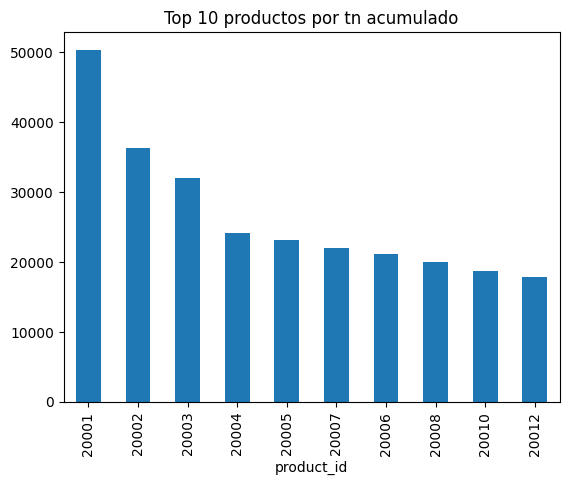

In [28]:
top_products = sell_in.groupby('product_id')['tn'].sum().sort_values(ascending=False)
top_products.head(10).plot(kind='bar')
plt.title('Top 10 productos por tn acumulado')

In [29]:
top_products = sell_in.groupby('product_id')['tn'].sum().sort_values(ascending=False)
top_products = top_products.reset_index(drop=False)
top_products["tn_cumsum"] = top_products["tn"].cumsum().round(2) / top_products["tn"].sum().round(2) * 100
top_products[:20]

,product_id,tn,tn_cumsum
0,20001,50340.39558,3.799308
1,20002,36337.25439,6.541766
2,20003,32004.15274,8.957194
3,20004,24178.15379,10.781977
4,20005,23191.21852,12.532272
5,20007,22018.45234,14.194057
6,20006,21088.76007,15.785675
7,20008,19948.29352,17.291219
8,20010,18671.07918,18.700369
9,20012,17813.59935,20.044804


## TN por socio

Text(0.5, 1.0, 'Top 10 socios por tn acumulado')

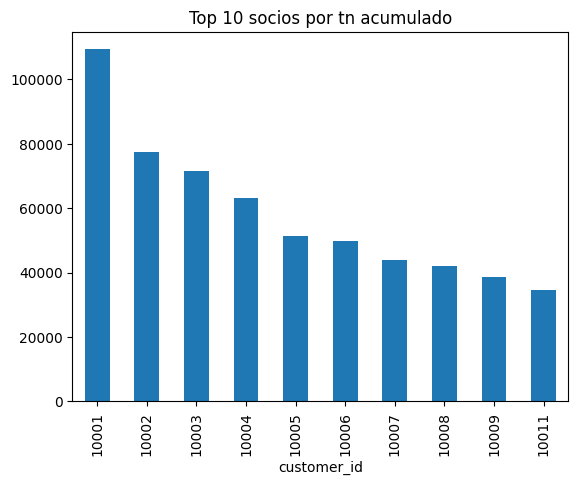

In [30]:
top_customers = sell_in.groupby('customer_id')['tn'].sum().sort_values(ascending=False)
top_customers.head(10).plot(kind='bar')
plt.title('Top 10 socios por tn acumulado')

In [31]:
top_customers = sell_in.groupby('customer_id')['tn'].sum().sort_values(ascending=False)
top_customers = top_customers.reset_index(drop=False)
top_customers["tn_cumsum"] = top_customers["tn"].cumsum().round(2) / top_customers["tn"].sum().round(2) * 100
top_customers[:20]

,customer_id,tn,tn_cumsum
0,10001,109203.60059,8.241852
1,10002,77333.16887,14.078368
2,10003,71375.91941,19.465276
3,10004,63065.94269,24.225011
4,10005,51467.04585,28.109350
5,10006,49779.23364,31.866305
6,10007,43740.39629,35.167496
7,10008,41962.99046,38.334541
8,10009,38742.71591,41.258545
9,10011,34675.44337,43.875582


## TN para cliente particular

### Cliente 10253 - Producto 21131

<Axes: title={'center': 'TN para customer_id 10253 y product_id 21131'}, xlabel='periodo,customer_id,product_id'>

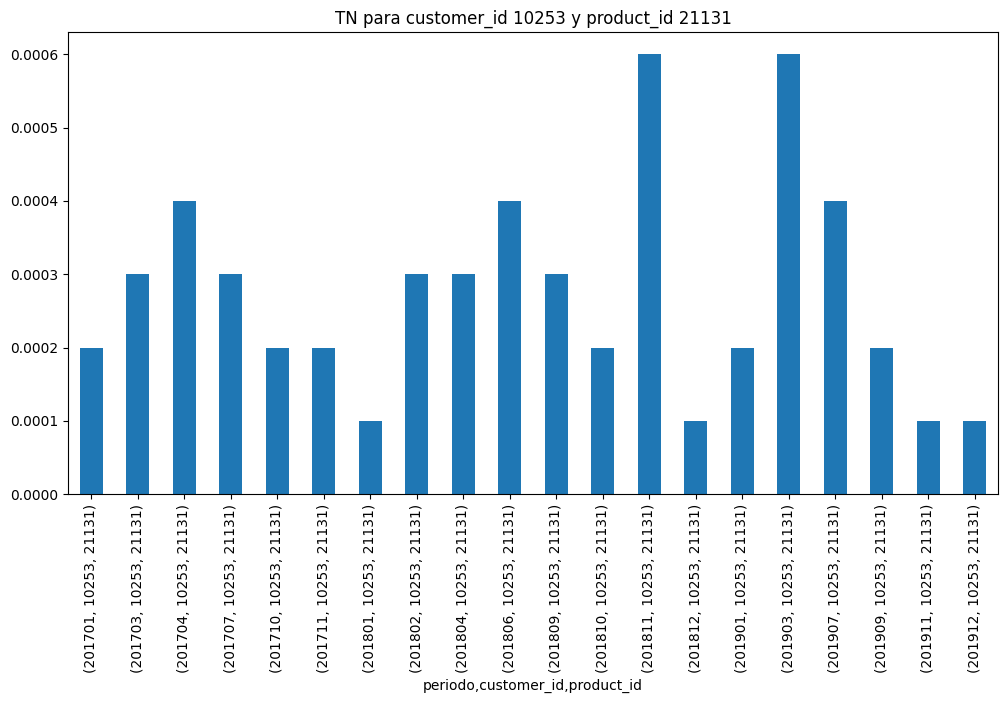

In [32]:
sell_in_index.loc[pd.IndexSlice[:, 10253, 21131], ["tn"]]["tn"].plot(kind="bar", figsize=(12, 6), title="TN para customer_id 10253 y product_id 21131")

## Base Completa (Merge sell-in y catálogo productos)

In [33]:
sell_in_wproducts = sell_in.merge(tb_productos, on="product_id", how="left", suffixes=("", "_prod"))
sell_in_wproducts.sample(10, random_state=42)

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
234029,201703,10436,20820,0,1,0.00294,0.00294,PC,DEOS,NoAero,DEOS1,50.0,Avena
327075,201704,10036,20724,0,1,0.18236,0.18236,HC,ROPA ACONDICIONADOR,Concentrado,VIVERE,450.0,Cuidado Celestial
2132224,201902,10100,20080,0,1,0.79618,0.79618,PC,CABELLO,ACONDICIONADOR,SHAMPOO2,930.0,pera
893728,201711,10250,20272,0,1,0.00393,0.00393,PC,DEOS,Aero,DEOS1,90.0,Active
2022718,201812,10219,21209,0,1,0.00501,0.00501,PC,PIEL1,Limpieza,SKIN1,150.0,humectante
1086980,201801,10051,20189,0,2,0.04492,0.04492,PC,CABELLO,SHAMPOO,NIVEA,400.0,reconstruccion raices
1548020,201806,10039,20167,0,1,0.45405,0.45405,PC,CABELLO,ACONDICIONADOR,SHAMPOO3,300.0,Restauracion Raiz
1697748,201808,10055,20209,0,1,0.52416,0.52416,HC,HOGAR,Cremoso,MUSCULO,375.0,Crema Ultra Blanco
1436225,201805,10046,20434,0,2,0.49945,0.49945,PC,CABELLO,Acond Mujer,NIVEA,200.0,hidratacion profunda
2277457,201904,10050,20424,0,2,0.13134,0.13134,PC,DEOS,Aero,DEOS3,100.0,Sabor 1


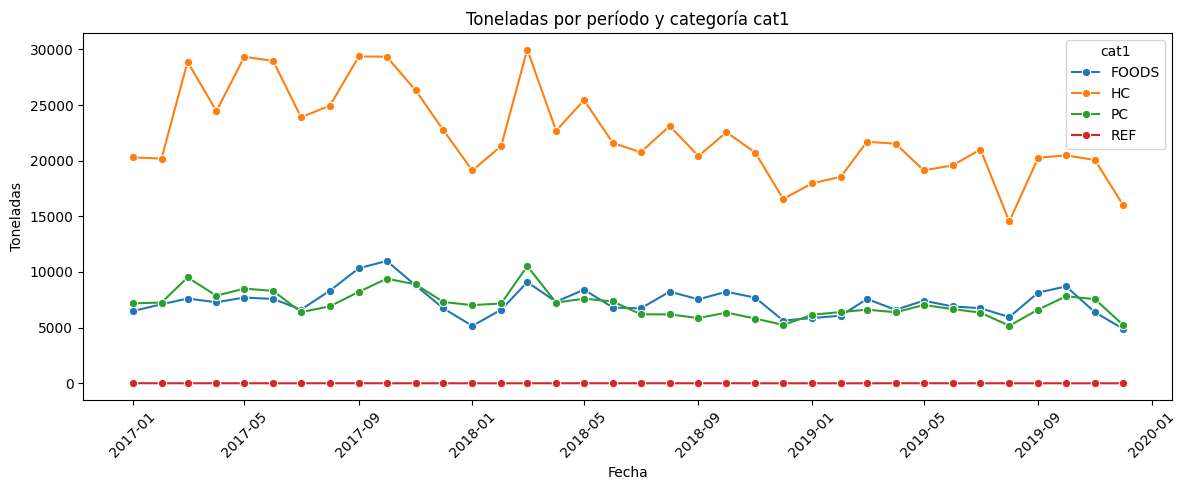

In [34]:
# Agrupar datos
df_cat1 = sell_in_wproducts.groupby(['periodo', 'cat1'])['tn'].sum().reset_index()

# Crear columna de fecha (último día del mes)
df_cat1["fecha"] = pd.to_datetime(df_cat1['periodo'].astype(str), format="%Y%m")

# Graficar usando la fecha como eje x
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_cat1, x='fecha', y='tn', hue='cat1', marker='o')
plt.title('Toneladas por período y categoría cat1')
plt.ylabel('Toneladas')
plt.xlabel('Fecha')
plt.legend(title='cat1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


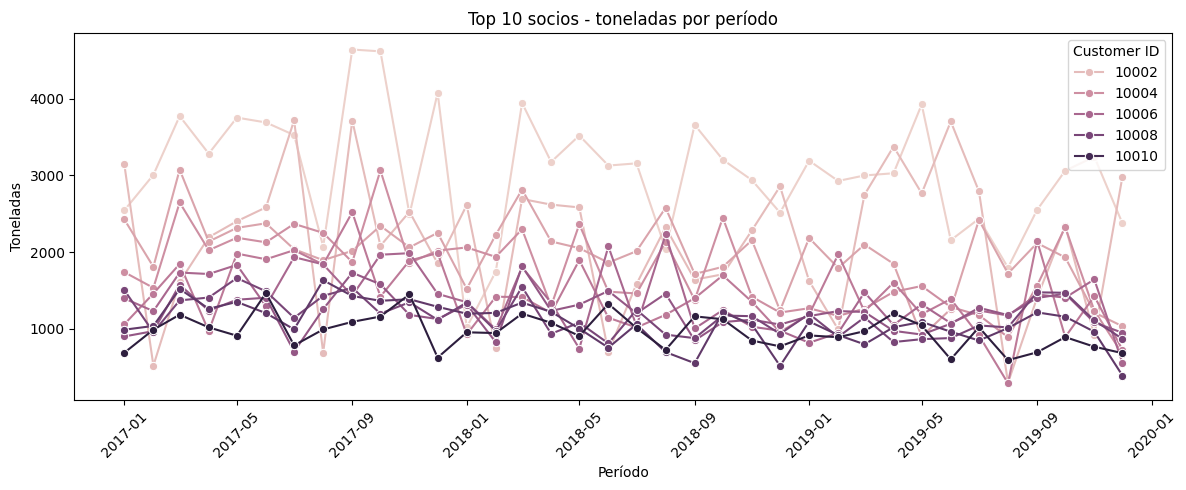

In [35]:
top_customers = sell_in_wproducts.groupby('customer_id')['tn'].sum().nlargest(10).index
df_top_customers = sell_in_wproducts[sell_in_wproducts['customer_id'].isin(top_customers)]
df_top_customers_agg = df_top_customers.groupby(['periodo', 'customer_id'])['tn'].sum().reset_index()
df_top_customers_agg["fecha"] = pd.to_datetime(df_top_customers_agg['periodo'].astype(str), format="%Y%m")

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_top_customers_agg, x='fecha', y='tn', hue='customer_id', marker='o')
plt.title('Top 10 socios - toneladas por período')
plt.ylabel('Toneladas')
plt.xlabel('Período')
plt.legend(title='Customer ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


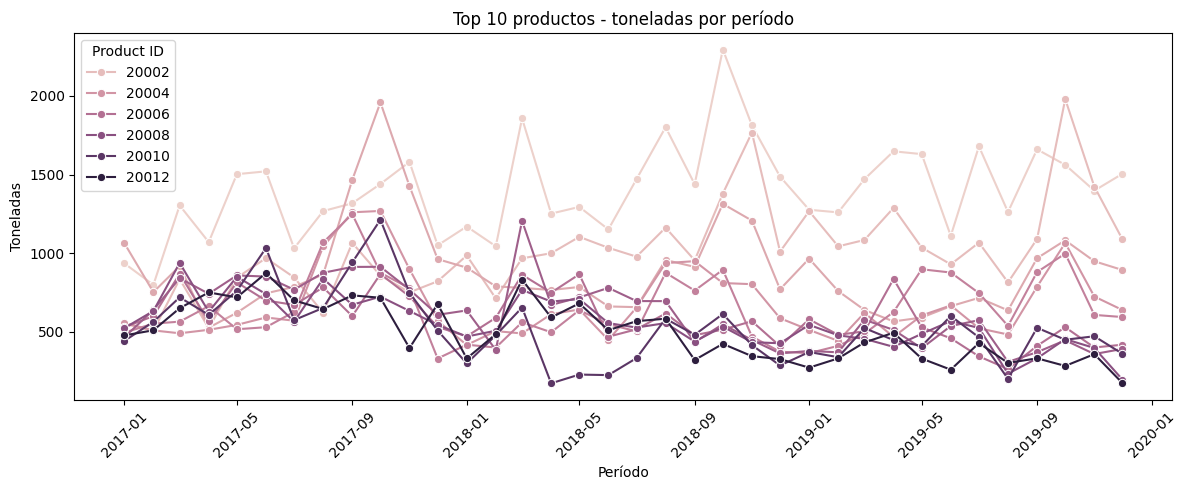

In [36]:
top_products = sell_in_wproducts.groupby('product_id')['tn'].sum().nlargest(10).index
df_top_products = sell_in_wproducts[sell_in_wproducts['product_id'].isin(top_products)]
df_top_products_agg = df_top_products.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()
df_top_products_agg["fecha"] = pd.to_datetime(df_top_products_agg['periodo'].astype(str), format="%Y%m")

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_top_products_agg, x='fecha', y='tn', hue='product_id', marker='o')
plt.title('Top 10 productos - toneladas por período')
plt.ylabel('Toneladas')
plt.xlabel('Período')
plt.legend(title='Product ID')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


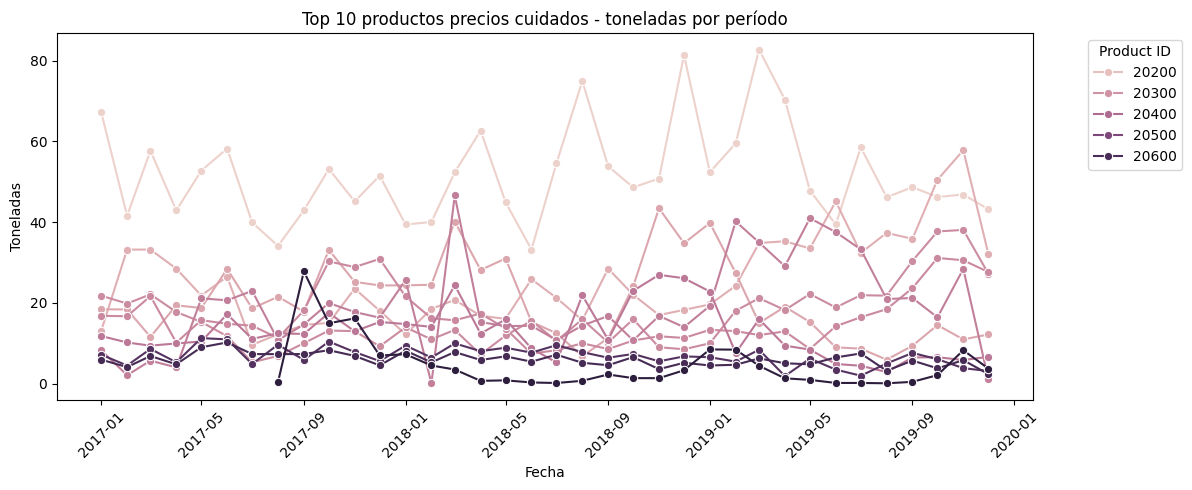

In [37]:
# Lista de los top 10 productos de precios cuidados
top_product_ids = [20235, 20316, 20255, 20362, 20160, 20321, 20579, 20657, 20606, 20345]

# Filtrar ventas de esos productos
df_top_products = sell_in_wproducts[sell_in_wproducts['product_id'].isin(top_product_ids)]

# Agrupar por período y producto
df_top_products_agg = df_top_products.groupby(['periodo', 'product_id'])['tn'].sum().reset_index()

# Crear columna de fecha
df_top_products_agg["fecha"] = pd.to_datetime(df_top_products_agg['periodo'].astype(str), format="%Y%m")

# Graficar
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_top_products_agg, x='fecha', y='tn', hue='product_id', marker='o')
plt.title('Top 10 productos precios cuidados - toneladas por período')
plt.ylabel('Toneladas')
plt.xlabel('Fecha')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Como es el comportamiento del producto más comprado? El 20001...

In [38]:
data = sell_in_wproducts[sell_in_wproducts["product_id"] == 20001]
data

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
44019,201701,10001,20001,0,11,99.43861,99.43861,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
44020,201701,10063,20001,0,1,0.12312,0.12312,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
44021,201701,10080,20001,0,1,0.24625,0.24625,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
44022,201701,10094,20001,0,1,1.23123,1.23123,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
44023,201701,10184,20001,0,1,0.06716,0.06716,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909818,201912,10069,20001,0,1,7.39339,7.39339,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
2909819,201912,10328,20001,0,1,0.24645,0.24645,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
2909820,201912,10374,20001,0,1,0.11202,0.11202,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma
2909821,201912,10390,20001,0,1,0.03361,0.03361,HC,ROPA LAVADO,Liquido,ARIEL,3000.0,genoma


In [39]:
for col in ["cat1", "cat2", "cat3", "sku_size", "brand"]:
    print(data[col].value_counts(dropna=False, normalize=True))

cat1
HC    1.0
Name: proportion, dtype: float64
cat2
ROPA LAVADO    1.0
Name: proportion, dtype: float64
cat3
Liquido    1.0
Name: proportion, dtype: float64
sku_size
3000.0    1.0
Name: proportion, dtype: float64
brand
ARIEL    1.0
Name: proportion, dtype: float64


In [40]:
data = sell_in_wproducts[sell_in_wproducts["product_id"] == 20001]
data = data.groupby("periodo").agg(
    {
        'customer_id': 'nunique', 
        'product_id': 'nunique', 
        'plan_precios_cuidados': ['sum', 'mean'], 
        'cust_request_qty': ['sum', 'mean', 'min', 'max'],
        'cust_request_tn': ['sum', 'mean', 'min', 'max'],
        'tn': ['sum', 'mean', 'min', 'max']
    }).reset_index(drop=False).sort_values(by="periodo", ascending=True)
data.columns = [
    "periodo", 
    "num_customers", 
    "num_products", 
    "plan_precios_cuidados_sum", 
    "plan_precios_cuidados_mean", 
    "cust_request_qty_sum", 
    "cust_request_qty_mean", 
    "cust_request_qty_min", 
    "cust_request_qty_max",
    "cust_request_tn_sum", 
    "cust_request_tn_mean", 
    "cust_request_tn_min", 
    "cust_request_tn_max",
    "tn_sum", 
    "tn_mean", 
    "tn_min", 
    "tn_max"
]

# Convertir 'periodo' a datetime (primero de cada mes)
data["fecha"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")

# Establecer 'fecha' como índice
data.set_index("fecha", inplace=True)

data

,periodo,num_customers,num_products,plan_precios_cuidados_sum,plan_precios_cuidados_mean,cust_request_qty_sum,cust_request_qty_mean,cust_request_qty_min,cust_request_qty_max,cust_request_tn_sum,cust_request_tn_mean,cust_request_tn_min,cust_request_tn_max,tn_sum,tn_mean,tn_min,tn_max
fecha,,,,,,,,,,,,,,,,,
2017-01-01,201701,186,1,0,0.0,479,2.575269,1,49,937.72717,5.041544,0.01119,184.72927,934.77222,5.025657,0.01119,184.72927
2017-02-01,201702,185,1,0,0.0,432,2.335135,1,48,833.72187,4.506605,0.01119,198.84365,798.01620,4.313601,0.01119,198.84365
2017-03-01,201703,188,1,0,0.0,509,2.707447,1,33,1330.74697,7.078441,0.02239,313.90769,1303.35771,6.932754,0.02239,295.43924
2017-04-01,201704,104,1,0,0.0,279,2.682692,1,28,1132.94430,10.893695,0.01119,267.35600,1069.96130,10.288089,0.01119,264.71445
2017-05-01,201705,238,1,0,0.0,701,2.945378,1,63,1550.68936,6.515502,0.01119,216.36069,1502.20132,6.311770,0.01119,216.36069
2017-06-01,201706,220,1,0,0.0,570,2.590909,1,61,1575.82891,7.162859,0.01119,246.24600,1520.06539,6.909388,0.01119,246.24600
2017-07-01,201707,151,1,0,0.0,381,2.523179,1,32,1086.47101,7.195172,0.01119,407.02225,1030.67391,6.825655,0.01119,379.44270
2017-08-01,201708,236,1,0,0.0,643,2.724576,1,48,1289.66869,5.464698,0.01119,247.01832,1267.39462,5.370316,0.01119,237.16848
2017-09-01,201709,163,1,0,0.0,381,2.337423,1,49,1356.96103,8.324914,0.01119,289.35024,1316.94604,8.079424,0.01119,289.35024


<Axes: title={'center': 'Cantidad de socios por periodo (producto 20001)'}, xlabel='fecha'>

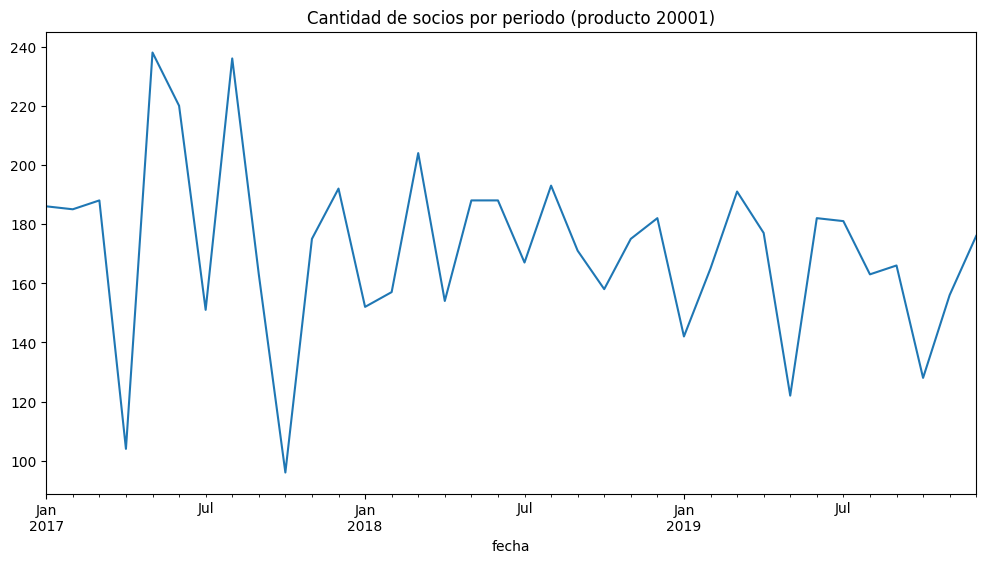

In [41]:
data["num_customers"].plot(kind="line", figsize=(12, 6), title="Cantidad de socios por periodo (producto 20001)")

<Axes: title={'center': 'Suma TN por periodo (producto 20001)'}, xlabel='fecha'>

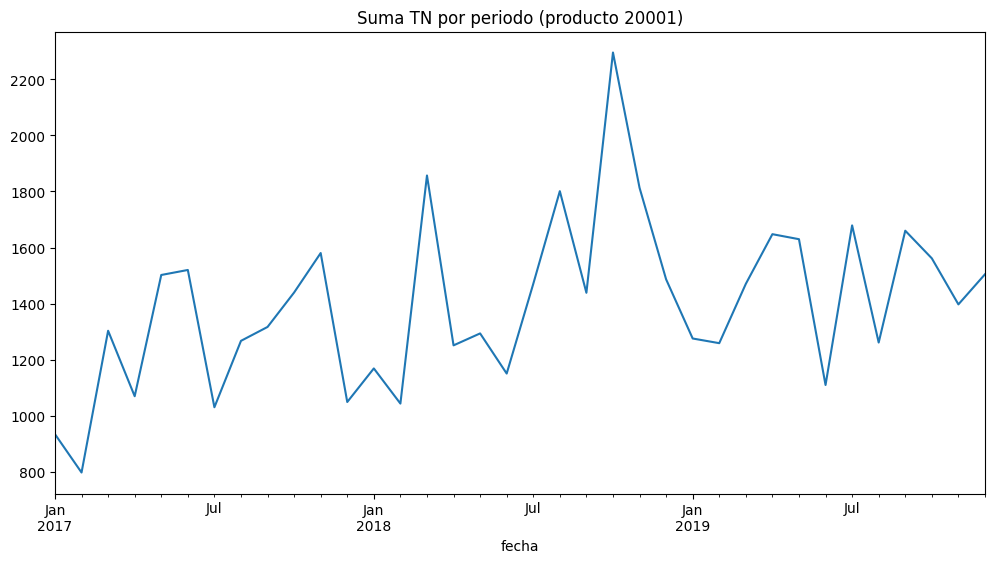

In [42]:
data["tn_sum"].plot(kind="line", figsize=(12, 6), title="Suma TN por periodo (producto 20001)")

## Como es el comportamiento del cliente más comprado? El 10001...

In [43]:
data = sell_in_wproducts[sell_in_wproducts["customer_id"] == 10001]
data

,periodo,customer_id,product_id,plan_precios_cuidados,cust_request_qty,cust_request_tn,tn,cat1,cat2,cat3,brand,sku_size,descripcion
63,201701,10001,20524,0,5,0.68141,0.68141,HC,VAJILLA,Cristalino,Importado,500.0,Abrillantador
182,201701,10001,20654,0,7,0.30149,0.26286,PC,DEOS,Aero,DEOS2,60.0,Sabor 8
382,201701,10001,21005,0,5,0.22015,0.22015,FOODS,SOPAS Y CALDOS,Caldos Granulados,MAGGI,12.0,Claldo Granulado verduras sin sal
393,201701,10001,20974,0,4,0.88234,0.88234,FOODS,SOPAS Y CALDOS,Caldos Granulados,MAGGI,12.0,Claldo Granulado verduras
433,201701,10001,20828,0,2,0.16589,0.16589,FOODS,SOPAS Y CALDOS,Dishes,MAGGI,8.0,Fideos al verdeo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2945321,201912,10001,20699,0,2,0.01327,0.01327,PC,DENTAL,CREMA,COLGATE,90.0,Spicy
2945384,201912,10001,20883,0,3,0.03243,0.03243,PC,DENTAL,CREMA,COLGATE,90.0,AA
2945570,201912,10001,20453,0,7,1.54626,1.54626,PC,DEOS,Aero,NIVEA,89.0,Aroma 2
2945658,201912,10001,21026,0,4,0.37456,0.37456,PC,CABELLO,Shampoo Bebe,NIVEA,400.0,Sabor 1


In [44]:
for col in ["cat1", "cat2", "cat3", "sku_size", "brand"]:
    print(data[col].value_counts(dropna=False, normalize=True))

cat1
PC       0.533796
HC       0.252509
FOODS    0.198403
REF      0.011801
NaN      0.003492
Name: proportion, dtype: float64
cat2
CABELLO                0.253913
DEOS                   0.136148
SOPAS Y CALDOS         0.121056
PIEL2                  0.083006
HOGAR                  0.080075
ROPA LAVADO            0.078952
ADEREZOS               0.070402
VAJILLA                0.053745
PIEL1                  0.048687
ROPA ACONDICIONADOR    0.037529
DENTAL                 0.012041
TE                     0.011801
OTROS                  0.006944
NaN                    0.003492
ROPA MANCHAS           0.001204
PROFESIONAL            0.001003
Name: proportion, dtype: float64
cat3
SHAMPOO             0.109497
ACONDICIONADOR      0.093160
Aero                0.088304
Liquido             0.047804
Sopas               0.040379
                      ...   
PurePapas           0.000401
Pastas              0.000241
Galletitas          0.000241
Tratamiento Masc    0.000080
Acond Bebe          0.00004

In [45]:
data = sell_in_wproducts[sell_in_wproducts["customer_id"] == 10001]
data = data.groupby("periodo").agg(
    {
        'customer_id': 'nunique', 
        'product_id': 'nunique', 
        'plan_precios_cuidados': ['sum', 'mean'], 
        'cust_request_qty': ['sum', 'mean', 'min', 'max'],
        'cust_request_tn': ['sum', 'mean', 'min', 'max'],
        'tn': ['sum', 'mean', 'min', 'max']
    }).reset_index(drop=False).sort_values(by="periodo", ascending=True)
data.columns = [
    "periodo", 
    "num_customers", 
    "num_products", 
    "plan_precios_cuidados_sum", 
    "plan_precios_cuidados_mean", 
    "cust_request_qty_sum", 
    "cust_request_qty_mean", 
    "cust_request_qty_min", 
    "cust_request_qty_max",
    "cust_request_tn_sum", 
    "cust_request_tn_mean", 
    "cust_request_tn_min", 
    "cust_request_tn_max",
    "tn_sum", 
    "tn_mean", 
    "tn_min", 
    "tn_max"
]

# Convertir 'periodo' a datetime (primero de cada mes)
data["fecha"] = pd.to_datetime(data["periodo"].astype(str), format="%Y%m")

# Establecer 'fecha' como índice
data.set_index("fecha", inplace=True)

data

,periodo,num_customers,num_products,plan_precios_cuidados_sum,plan_precios_cuidados_mean,cust_request_qty_sum,cust_request_qty_mean,cust_request_qty_min,cust_request_qty_max,cust_request_tn_sum,cust_request_tn_mean,cust_request_tn_min,cust_request_tn_max,tn_sum,tn_mean,tn_min,tn_max
fecha,,,,,,,,,,,,,,,,,
2017-01-01,201701,1,668,8,0.011976,4013,6.007485,1,26,2567.40529,3.843421,0.00581,100.21284,2543.89944,3.808233,0.00581,100.21284
2017-02-01,201702,1,650,8,0.012308,2923,4.496923,1,25,3010.01367,4.630790,0.00157,198.84365,3007.08273,4.626281,0.00157,198.84365
2017-03-01,201703,1,700,8,0.011429,5848,8.354286,1,41,3820.64849,5.458069,0.00058,116.60867,3772.79718,5.389710,0.00058,116.60867
2017-04-01,201704,1,687,8,0.011645,4474,6.512373,1,41,3333.73931,4.852605,0.00217,172.55531,3283.44204,4.779392,0.00217,170.77765
2017-05-01,201705,1,702,5,0.007123,5328,7.589744,1,31,3761.19311,5.357825,0.00433,122.61757,3753.20470,5.346445,0.00433,122.40283
2017-06-01,201706,1,709,5,0.007052,4673,6.590973,1,40,3701.10987,5.220183,0.00819,167.46470,3689.86917,5.204329,0.00819,167.46470
2017-07-01,201707,1,679,4,0.005891,4365,6.428571,1,47,3571.80928,5.260397,0.00218,235.00517,3525.52603,5.192233,0.00205,234.69166
2017-08-01,201708,1,646,5,0.007740,3151,4.877709,1,42,2115.13567,3.274204,0.00437,124.11229,2072.32993,3.207941,0.00437,116.63986
2017-09-01,201709,1,689,5,0.007257,4893,7.101597,1,36,4699.36554,6.820560,0.00115,289.35024,4640.71285,6.735432,0.00115,289.35024


<Axes: title={'center': 'Cantidad de productos por periodo (cliente 10001)'}, xlabel='fecha'>

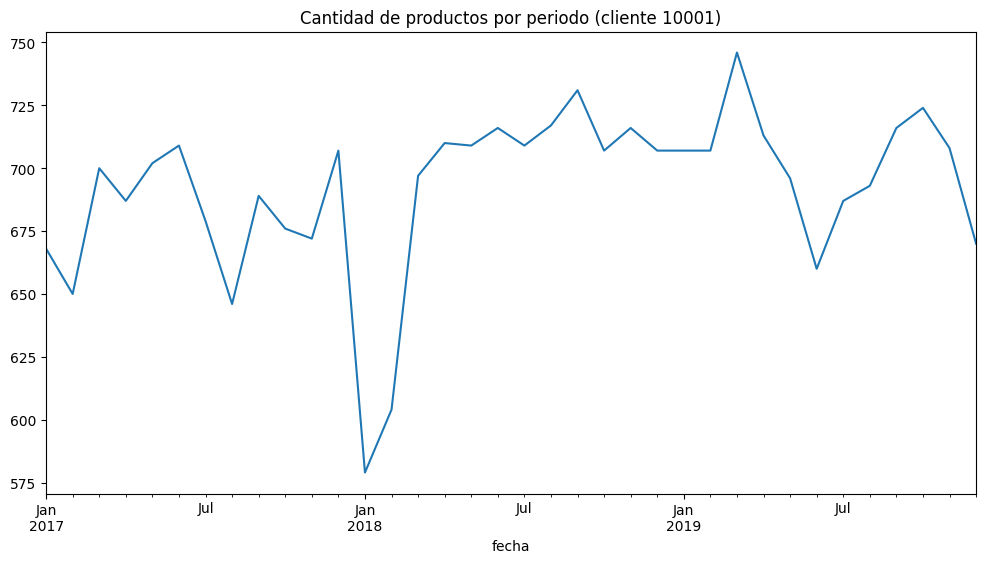

In [46]:
data["num_products"].plot(kind="line", figsize=(12, 6), title="Cantidad de productos por periodo (cliente 10001)")

<Axes: title={'center': 'Suma TN por periodo (cliente 10001)'}, xlabel='fecha'>

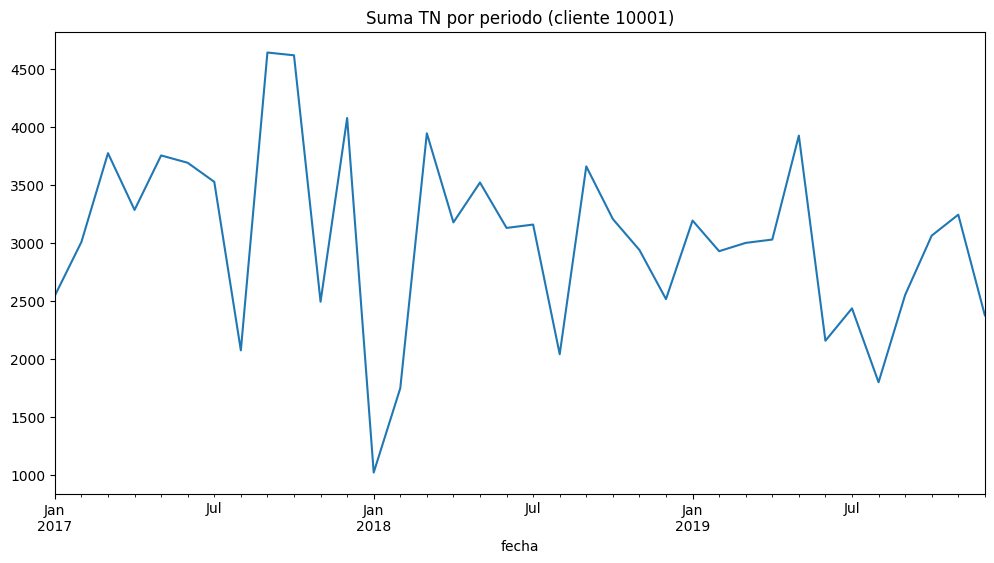

In [47]:
data["tn_sum"].plot(kind="line", figsize=(12, 6), title="Suma TN por periodo (cliente 10001)")